# Motion Prototype Generation

Example usage of motion prototype generator.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from src.actprogen import effect_based_prototypes

## Data Load

In [2]:
df_data = pd.read_csv("data/motion_samples.csv")
df_data = df_data[df_data['robot_in_map'] == True]
df_data = df_data.sample(n=2000,random_state=42)

## Effect and Motion Dimensions

In [3]:
effect_dims = ['dy', 'dz']
motion_dims = ['magnitude', 'angle']

## Prototype Generation

In [4]:
prototype_generator = effect_based_prototypes.EffectActionPrototypes(df_data, motion_dims)
prototypes = prototype_generator.generate(effect_dimensions=effect_dims)

## Visualitation

In [5]:
colors = ['red', 'green', 'blue', 'magenta', 'yellow', 'pink', 'cyan']

def color_picker(x):
    return colors[x]

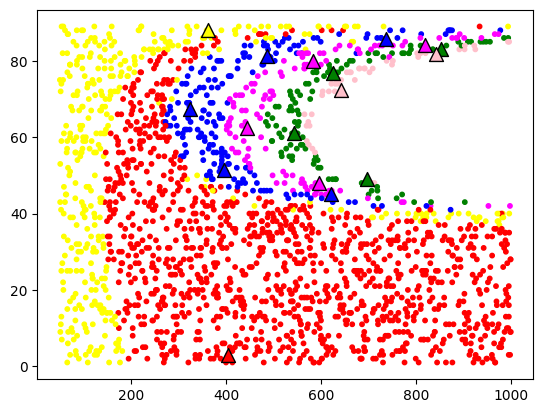

In [6]:
plt.scatter(df_data.magnitude, df_data.angle, c=list(map(color_picker,prototype_generator.m_samples_labeled['cluster_label'])), s=10)

for i, label in enumerate(set(prototype_generator.m_samples_labeled['cluster_label'])):
    local_ap = prototype_generator.prototypes_per_label[label]      
    plt.scatter(local_ap.T[0], local_ap.T[1], marker="^", s=100, color=colors[i], edgecolors='black')
plt.show()